# Курсовая работа. Блок ML Beginner

**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей.

# Содержание
## [1. Описание данных](#init_data_description)

### [1.1 Используемые библиотеки](#init_libraries)
### [1.2 Загрузка файла и его содержимое](#read_file)
### [1.3 Работа с пропусками и выбор используемых признаков](#missing_values)
### [1.4 Преобразование типов](#type_fit)

## [3. Построение моделей](#models_caption)
### [3.1 Предобработка данных для загрузки в модель](#models_data_prep)
### [3.2 Разбивка датасета на тренировочный и тестовый](#split)
### [3.3 Логистическая регрессия](#logreg)
### [3.4 Деревья решений](#decision_tree)
### [3.5 Случайный лес](#random_forest)
### [3.6 CatBoost](#catboost)

<a id='init_data_description'></a>
<h2><center>1. Описание данных</h2>

<a id='init_libraries'></a>
<div class='alert alert-info'>
<p>Для начала импортируем библиотеки, желательно делать все импорты в одном месте, чтобы у проверяющего была возможность в случае необходимости быстро настроить окружение
</p>
</div>

In [4]:
#Библиотеки для загрузки и обработки данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Для визуализации
import plotly.express as px
import plotly.graph_objects as go

#Для построениея моделей прогнозирования
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

#Для тестирования качества построенных моделей
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix


<div class='alert alert-info'>
<p>Задаем глобальные переменные, чтобы при необходимости их изменить не искать в каждой ячейке кода, а поменять сразу во всем ноутбуке
</div>

In [6]:
#GLOBAL
RANDOM_SEED = 17
VAL_SIZE   = 0.3
N_FOLDS    = 5

# CATBOOST
ITERATIONS = 3000
LR         = 0.01

<a id='read_file'></a>
<div class='alert alert-info'>
    <p>Загружаем файл в датафрейм</p>
</div>

In [18]:
df = pd.read_csv('./data/telecom_users.csv')

<div class='alert alert-info'>
    <h4>Описание данных</h4>
<br>


`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>
    </div>

<a id="missing_values"></a>
<div class ='alert alert-info'>
<p>Смотрим на содержимое файла</p></div>

In [19]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


<div class='alert alert-info'>
    <p>Очевидно, что первые 2 признака нам вряд ли помогут в решении задачи классификации, удалим их</p>
</div>

In [20]:
df = df[df.columns[2:]]
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes


In [22]:
#Смотрим на типы данных и на количество пропущенных значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [23]:
print(df.isna().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<div class='alert alert-warning'>
    <p>
        Метод df.info() показывает, что в датафрейме нет пропущенных значений, однако это не совсем так.</p>
Если посмотреть внимательнее на признак <font color='red'>TotalCharhes</font>,
то окажется, что в нем
        есть пропуски, просто они закодированы пробелом (вместо 0 стоит пробел).
        Кстати, именно поэтому признаку TotalCharges присвоен тип <font color='green'>object</font>, хотя очевидно, что должен быть <font color='green'>float64</font>
    </p>
    </div>

In [26]:
#Смотрим на пропущенные значения
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


<div class='alert alert-info'>
    У нас есть 2 варианта обработки пропущенных значений:
            <ol>
            <li>Удалить пропуски</li>
            <li>Заполнить пропуски значениями</li>
            </ol>
    <p>Если посмотреть на признак <font color='red'>tenure</font> (сколько месяцев человек является клиентом компании), то видно, что значение признака у всех = 0. Все эти клиенты пользуются услугами компании первый месяц.</p>
    <p>Очевидно, что для них можно заполнить пропуски размером месячной оплаты</p>
</div>

In [28]:
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = df[df['TotalCharges'] == ' ']['MonthlyCharges']

<a id='type_fit'></a>
<div class='alert alert-info'>
    <p>
        Необходимо разобраться с типами данных. В датасете представлено 3 числовых признака: (tenure, MonthlyCharges, TotalCharges), все остальные - это категориальные данные.</p>
    <p>Для признака <font color='red'>TotalCharges</font> - поменяем тип данных на числовой.</p>
    <p>Для признака <font color='red'>SeniorCitizen</font> я поменяю тип на object - т.к. данные в нем представлены всего 2 значениями: 0 и 1, логичнее будет получить из него впоследствии dummy-переменные
    </p>
    </div>

In [32]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [33]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

<a id='models_caption'></a>
<h2><center>3. Построение моделей</center></h2>

<a id='models_data_prep'></a>
<div class='alert alert-info'>
<p>Для начала сохраним целевой признак в отдельную переменную</p>
</div>

In [37]:
Y = df['Churn'].copy()
df = df.drop('Churn', axis=1)

<div class='alert alert-info'>
    <p>
        На предыдущем шаге мы преобразовали данные к нужным нам типам.</p>
    <p>Смотрим на количество уникальных элементов в категориальных признаках
    </p>
    </div>

In [38]:
df.select_dtypes(include=['object']).nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

<div class='alert alert-info'>
    <p>
        Максимальное количество уникальных элеметов для признаков - 4, это позволяет без особых затрат преобразовать их в dummy переменные
    </p>
    </div>

In [40]:
#Сохраняем в отдельную переменную категориальные признаки
cat_columns = df.select_dtypes(include=['object']).columns

In [41]:
#В отдельный датафрейм сохраним инфо из исходного с закодированными dummy переменными для категориальных признаков
df_main = pd.get_dummies(df, prefix=cat_columns)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   5986 non-null   int64  
 1   MonthlyCharges                           5986 non-null   float64
 2   TotalCharges                             5986 non-null   float64
 3   gender_Female                            5986 non-null   uint8  
 4   gender_Male                              5986 non-null   uint8  
 5   SeniorCitizen_0                          5986 non-null   uint8  
 6   SeniorCitizen_1                          5986 non-null   uint8  
 7   Partner_No                               5986 non-null   uint8  
 8   Partner_Yes                              5986 non-null   uint8  
 9   Dependents_No                            5986 non-null   uint8  
 10  Dependents_Yes                           5986 no

<div class='alert alert-info'>
    <p>
        В итоге мы получаем датафрейм, содержащий 46 признаков.</p>
        <p>Осталось разобраться с числовыми типами данных: для повышения точности моделей их желательно стандартизировать (стандартизацию будем делать только для 3 признаков, т.к. для dummy переменных эта операция не будет иметь никакого эффекта)
    </p>
    </div>

In [42]:
#Выбираем признаки с числовыми типами данных
num_columns = df.select_dtypes(include=['number']).columns

In [44]:
#Применяем стандартизацию из пакета sklearn
sc = StandardScaler()
df_main[num_columns] = sc.fit_transform(df[num_columns])
df_main.head(5)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.612576,-1.351686,-0.246111,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
1,0.470387,0.775360,0.738338,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
2,0.225633,0.336999,0.253117,1,0,0,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
3,-1.161310,-0.295635,-0.904075,0,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
4,-1.242895,-0.376997,-0.956408,0,1,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0


<div class='alert alert-info'>
    <p>
        Для удобства приведем все названия признаков к нижнему регистру. Это позволит избежать возможных опечаток
    </p>
    </div>

In [45]:
df_main.columns = map(lambda x: x.lower().strip(), df_main.columns)

<div class='alert alert-info'>
    <p>
        Классы в целевой переменной Churn распределены неравномерно. Отток составляет 26% из всех представленных данных.
    </p>
    </div>

In [53]:
#Смотрим на распределение значений целевой переменной. 
#Параметр normalize - для отображения не абсолютных, а относительных значений
Y.value_counts(normalize=True)

No     0.734881
Yes    0.265119
Name: Churn, dtype: float64

In [54]:
#Строим график распределения
px.bar(y=Y.value_counts(normalize=True), title='Доля оттока клиентов')

In [55]:
#Для корректного обучения моделей, закодируем значения целевой переменной 0 и 1
Y = Y.map({'Yes':1, 'No':0})

<a id='split'></a>
<div class='alert alert-info'>
    <p>
        Разбиваем датасет на тренировочный и тестовый
    </p>
    </div>

In [57]:
#Используем, где возможно, глобальные переменные
#Для воспроизводимости результатов устанавливаем random_state
#Т.к. значения целевой переменной распределены неравномерно, стратифицируем разбивку по данному признаку
x_train, x_test, y_train, y_test = train_test_split(df_main, Y, test_size=VAL_SIZE,
                                                    random_state=RANDOM_SEED,
                                                    stratify=Y, shuffle=True)

In [58]:
#Функция для оценки модели, принимает эстиматор, и набор тестовых значений
#Ничего не возвращает, но дает информацию о базовых метриках качества
def eval_model(model, x_test, y_test):
    print('Accuracy score: {}'.format(accuracy_score(
        y_test, model.predict(x_test)
    )))
    print('Точность: {}'.format(precision_score(y_test, model.predict(x_test))))
    print('Полнота: {}'.format(recall_score(y_test, model.predict(x_test))))
    print('F1 Score: {}'.format(f1_score(y_test, model.predict(x_test))))
    print('Roc_Auc Score: {}'.format(roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])))
    plot_confusion_matrix(model, x_test, y_test)
    plot_roc_curve(model, x_test, y_test)
    plt.show()

<a id='logreg'></a>
<div class='alert alert-info'>
    <p>
        <center>Логистическая регрессия</center>
    </p>
    </div>

Accuracy score: 0.8028953229398663
Точность: 0.6596858638743456
Полнота: 0.5294117647058824
F1 Score: 0.5874125874125874
Roc_Auc Score: 0.8457203335879807


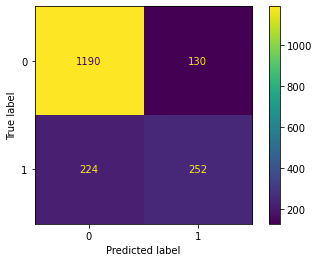

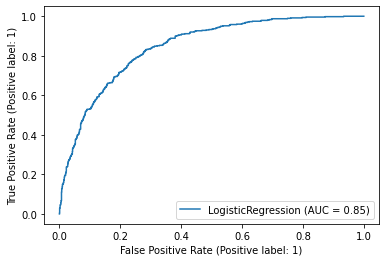

In [60]:
#Создаем экземпляр объекта модели, пенальти l1 - для "отброса" неинформативных признаков
log_reg = LogisticRegression(solver='liblinear', penalty='l1')
#Обучаем его
log_reg.fit(x_train, y_train)
#Получаем базовые метрики качества построенной модели
eval_model(log_reg, x_test, y_test)

<div class='alert alert-info'>
    <p>
        Т.к. для зачета курсовой достаточно метрики качества roc_auc > 0.8, то по сути с задачей мы справились в первом запуске на дефолтных параметрах.
    </p>
    <p>Тем не менее, интересно посмотреть, как покажут себя другие модели машинного обучения
    </p>
    </div>

<a id='decision_tree'></a>
<div class='alert alert-info'>
    <p>
        <center>Деревья решений</center>
    </p>
    </div>

Accuracy score: 0.7923162583518931
Точность: 0.6426592797783933
Полнота: 0.48739495798319327
F1 Score: 0.5543608124253285
Roc_Auc Score: 0.8178937484084543


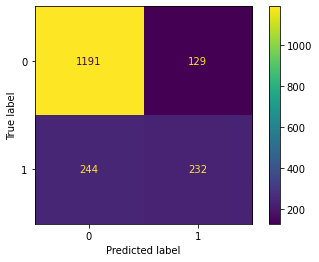

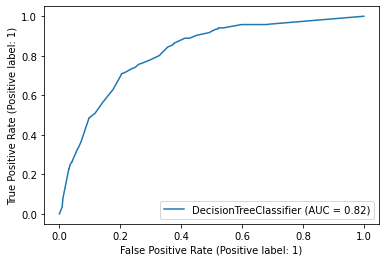

In [63]:
#Создаем экземпляр объекта модели
dtc = DecisionTreeClassifier(random_state=RANDOM_SEED, criterion='entropy', max_depth=7, min_samples_split=20)
#Обучение
dtc.fit(x_train, y_train)
#Оценка модели
eval_model(dtc, x_test, y_test)

<div class='alert alert-info'>
    <p>
        Алгоритм аналогично справился с поставленной задачей, хотя качество модели получилось чуть хуже
    </p>
    </div>

<a id='random_forest'></a>
<div class='alert alert-info'>
    <p>
        <center>Случайный лес</center>
    </p>
    </div>

Accuracy score: 0.8028953229398663
Точность: 0.7006578947368421
Полнота: 0.4474789915966387
F1 Score: 0.5461538461538461
Roc_Auc Score: 0.8525767125031831


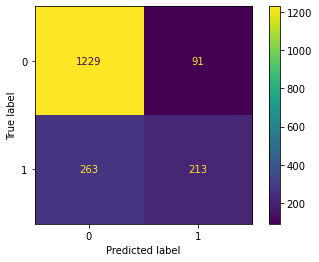

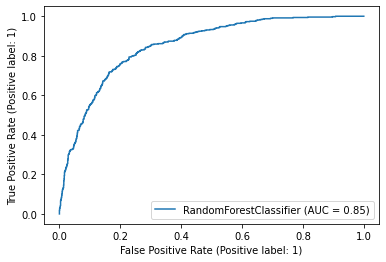

In [66]:
rfc = RandomForestClassifier(random_state=RANDOM_SEED, criterion='gini', max_depth=7,
                             max_features='auto',
                             min_samples_split=10)
rfc.fit(x_train, y_train)
eval_model(rfc, x_test, y_test)

<div class='alert alert-info'>
    <p>
        Модель показала достаточно неплохие результаты (roc_auc ~ 0.85), что неудивительно, т.к. по сути алгоритм представляет собой вариант бустинга на деревьями решений.
    </p>
    </div>

<a id='catboost'></a>
<div class='alert alert-info'>
    <p>
        <center>CatBoost</center>
    </p>
    </div>

In [73]:
#Создаем экземпляр объекта модели
cbc = CatBoostClassifier(iterations=ITERATIONS,
                         learning_rate=LR,
                         random_seed=RANDOM_SEED,
                         eval_metric='AUC',
                         task_type='CPU',
                         bagging_temperature=1,
                         random_strength=0.5)

In [74]:
#Для обучения используем старый датасет, без dummy-переменных, т.к. catboost и сам отлично с ними справляется
#Единственно, что нужно сделать - стандартизировать числовые признаки
df[num_columns] = sc.fit_transform(df[num_columns])

In [75]:
#Сохраняем id категориальных признаков,
#Как выяснили в начале работы - максимальное число уникальных значений для них составляет 4
cat_features_ids = np.where(df.apply(pd.Series.nunique) < 5)[0].tolist()

In [76]:
#Делаем повторно разбивку на тренировочную и тестовую
x_train, x_test, y_train, y_test = train_test_split(df, Y, test_size=VAL_SIZE,
                                                    shuffle=True,
                                                    random_state=RANDOM_SEED,
                                                    stratify=Y)

In [77]:
#Обучаем модель
cbc.fit(x_train, y_train,
          cat_features=cat_features_ids,
          eval_set=(x_test, y_test),
          verbose_eval=1000,
          use_best_model=True,
          plot=True
          )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8115912	best: 0.8115912 (0)	total: 6.8ms	remaining: 20.4s
1000:	test: 0.8516266	best: 0.8520038 (883)	total: 4.33s	remaining: 8.64s
2000:	test: 0.8477655	best: 0.8520038 (883)	total: 8.99s	remaining: 4.49s
2999:	test: 0.8448657	best: 0.8520038 (883)	total: 14s	remaining: 0us

bestTest = 0.852003756
bestIteration = 883

Shrink model to first 884 iterations.


In [78]:
#Сохраняем модель
cbc.save_model('./cbc_model.model')

Accuracy score: 0.8067928730512249
Точность: 0.6738544474393531
Полнота: 0.5252100840336135
F1 Score: 0.590318772136954
Roc_Auc Score: 0.8520037560478739


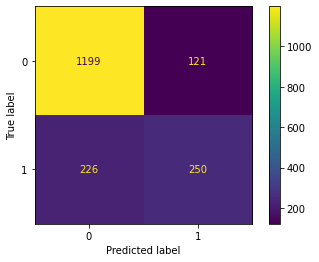

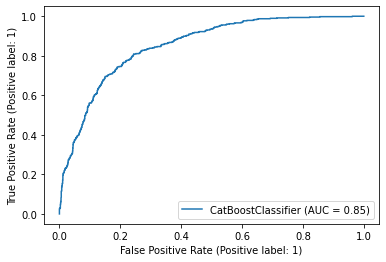

In [79]:
#Делаем оценку качества модели
eval_model(cbc, x_test, y_test)

<div class='alert alert-info'>
    <p>
        Модель также хорошо справилась с поставленной задачей, roc_auc_score > 80%
    </p>
    </div>